# cog_mod

The idea of this model is very simple. 

For the input, we record the number of times each letter appears in types A, B, and C. For example, if our test example is "HVY", then for category A, H appears 4 times in all A's, V appears 1 time and Y appears 2 times, then the score of "HVY" for A is 4 + 1 + 2 = 7. Also when the letter When the letter does not appear in the category, we use -6 as its score. For example, if the example is "CVY" and C does not appear in any Category A, the score of "CVY" for Category A is -6 + 2 + 1 = -3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### step1: import data from .csv

In [2]:
data = pd.ExcelFile("data.xlsx").parse('Sheet1')

In [3]:
data.head(5)

,Dim_1,Dim_2,Dim_3,category
0,H,R,W,category A
1,H,S,Y,category A
2,H,T,X,category A
3,L,T,Y,category A
4,K,T,Z,categories A and B


### step2: count how many times each character appears

In [4]:
def count_num(cate:str) -> dict: 
    dic = {}
    for row in data.itertuples():
        if cate in getattr(row, "category"):
            lst_dim = [getattr(row, "Dim_"+str(i)) for i in range(1,4)]
            for c in lst_dim:
                if c not in dic:
                    dic[c] = 1
                else:
                    dic[c] += 1
    return dic

In [5]:
#count of every character in category A
dic_A = count_num("A")

In [6]:
dic_A

{'H': 4,
 'R': 1,
 'W': 1,
 'S': 1,
 'Y': 2,
 'T': 3,
 'X': 2,
 'L': 1,
 'K': 1,
 'Z': 1,
 'V': 1}

In [7]:
#count of every character in category B
dic_B = count_num("B")

In [8]:
dic_B

{'K': 2,
 'T': 1,
 'Z': 5,
 'H': 1,
 'V': 3,
 'X': 1,
 'M': 2,
 'L': 1,
 'R': 1,
 'S': 1}

In [9]:
#count of every character in category C
dic_C = count_num("C")

In [10]:
dic_C

{'C': 5, 'T': 2, 'Y': 1, 'R': 2, 'Z': 1, 'S': 2, 'W': 4, 'K': 1}

In [11]:
####no use in model####
def sigmoid(x):
    return 1/(1 + np.exp(-x))

### step3: calculate the score for each combination

In [12]:
def predict(dim:str) -> float:
    #the score of each category is start by 0
    total_A = 0 
    total_B = 0
    total_C = 0
    for i in dim:
        #if the character appears in category A, then the final score add the count of the character 
        if i in dic_A:
            total_A += dic_A[i]
        #if it not in category A, then the final score -6
        else:
            total_A -= 6
        if i in dic_B:
            total_B += dic_B[i]
        else:
            total_B -= 6
        if i in dic_C:
            total_C += dic_C[i]
        else:
            total_C -= 6
    #return a list of score: A, B, C, A&B, A&C, B&C
    return [total_A, total_B, total_C, (total_A + total_B)/2, (total_A + total_C)/2, (total_C + total_B)/2]

In [13]:
#This is a test case about "KTX"
predict("KTX")

[6, 4, -3, 5.0, 1.5, 0.5]

test all the given combinations

In [14]:
lst_test = ["HRW", "HSY", "HTX", "LTY", "KTZ", "HVX", "MVZ", "KVZ", "LRZ", "MSZ", "CTY", "CRZ", "CSW", "CTW", "CRW", "KSW"]

In [15]:
for i in lst_test:
    print(predict(i))

[6, -4, 0, 1.0, 3.0, -2.0]
[7, -4, -3, 1.5, 2.0, -3.5]
[9, 3, -10, 6.0, -0.5, -3.5]
[6, -4, -3, 1.0, 1.5, -3.5]
[5, 8, 4, 6.5, 4.5, 6.0]
[7, 5, -18, 6.0, -5.5, -6.5]
[-4, 10, -11, 3.0, -7.5, -0.5]
[3, 10, -4, 6.5, -0.5, 3.0]
[3, 7, -3, 5.0, 0.0, 2.0]
[-4, 8, -3, 2.0, -3.5, 2.5]
[-1, -11, 8, -6.0, 3.5, -1.5]
[-4, 0, 8, -2.0, 2.0, 4.0]
[-4, -11, 11, -7.5, 3.5, 0.0]
[-2, -11, 11, -6.5, 4.5, 0.0]
[-4, -11, 11, -7.5, 3.5, 0.0]
[3, -3, 7, 0.0, 5.0, 2.0]


### step4: calculate the combination about the experiment

In [16]:
lst_test2 = ["HVY",
"CSZ",
"LTW",
"KVW",
"KRZ"]

In [17]:
pre_result = []
for i in lst_test2:
    pre_result.append(predict(i))

In [18]:
pre_lst = np.array(pre_result)

### step5: trans all the result to Z-score and compare

In [19]:
#calculate single Z-score
def z_score(value, mean, std_dev):
    return (value - mean) / std_dev

In [20]:
#calculate each Z-score
def z_score_lst(data):
    mean = data.mean()
    std_dev = data.std()
    return np.array([z_score(value, mean, std_dev) for value in data])

In [21]:
test = pd.ExcelFile("test.xlsx").parse('Sheet2')

In [22]:
test.head(10)

,Unnamed: 0,Dim 1,Dim 2,Dim 3,cate,score
0,1,H,V,Y,category A,6.777778
1,2,C,S,Z,category A,-9.333333
2,3,L,T,W,category A,-3.111111
3,4,K,V,W,category A,-3.055556
4,5,K,R,Z,category A,-1.388889
5,1,H,V,Y,category B,-2.000000
6,2,C,S,Z,category B,-3.222222
7,3,L,T,W,category B,-5.277778
8,4,K,V,W,category B,-0.555556
9,5,K,R,Z,category B,7.000000


In [23]:
test_data = np.array(test.score)

In [24]:
test_Z = z_score_lst(test_data)

In [25]:
pre_Z = z_score_lst(pre_lst).T.ravel()

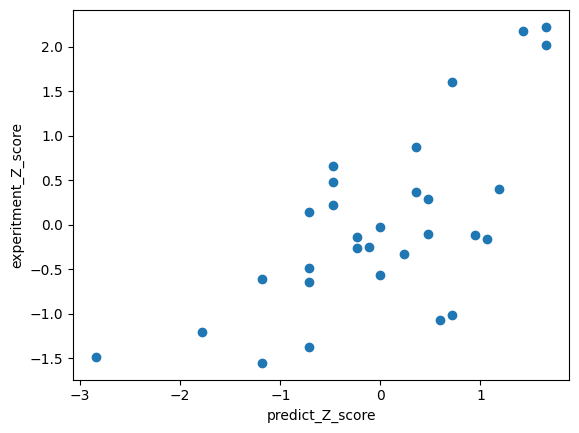

In [26]:
plt.scatter(pre_Z, test_Z)
plt.xlabel('predict_Z_score')
plt.ylabel('experitment_Z_score')
plt.show()

In [27]:
print("corrrelation:",np.corrcoef(pre_Z, test_Z)[0,1])

corrrelation: 0.6888659915290111


In [28]:
def ave_err(x,y):
    return sum([i - j for i in x
                 for j in y])
    

In [29]:
ave_err(pre_Z, test_Z)

3.68594044175552e-14